# Parametrization Analytics 

This notebook will analyze the parametrization of the model. For that we will simulate a range of line equations parametrization to determine the best one. With this, we always garantee that the worst guest of the neural network will be at least in the range of the data.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import sys
from sys import platform

global SLASH
if platform == "linux" or platform == "linux2":
    # linux
    SLASH = "/"
elif platform == "win32":
    # Windows...
    SLASH = "\\"

In [53]:
# Configurações
image_size = 224  # Tamanho da imagem

# Gerar coordenadas aleatórias para os pontos
y_coords = []
x_coords = []

# counting the steps
i, j = 0, 0
count_step = 0

# save data
plot_list = list()
mb_list = list()
wq_list = list()
wqn_list = list()

In [54]:
# rotacionar as retas
for angle in range(-30, 31, 1):
    i+=1
    j = 0
    if angle < -15 or angle > 15:
        bound = 1
    else: 
        bound = 1
    # print(f'Step: {i}, Angle: {angle}º')
    while j < bound:
        count_step += 1
        j += 1
        #* ################ DEFINITION ################

        pivot = (np.random.randint(82, 142), 0)
        if pivot[0] < 97 or pivot[0] > 127:
            divider = np.random.randint(70, 90)  # Espaçamento entre as retas
        else: 
            divider = np.random.randint(70, 110)

        # prevent problems with the angle
        if angle < -40 or angle > 40:
            divider -= 20
        
        # prevent problem with zero division
        if angle == 0:
            angle += 1
        
        #* ################ CREATE LINES ################

        # Equação da reta para as retas paralelas VERTICAIS (m = y2 - y1, sendo x2 - x1 = 1 forçado)
        # 
        x1 = image_size // 2 - divider // 2  # Coordenada x para a primeira reta (vertical)
        x2 = image_size // 2 + divider // 2  # Coordenada x para a segunda reta (vertical)

        # equação reta vertical (angle = 0): y = mx + b => m = y2 - y1 e b = y1 - (y2 - y1)*x1
        y1_1, y2_1 = 0, 0
        y1_2, y2_2 = image_size, image_size
        m1 = (y1_2 - y1_1)
        m2 = (y2_2 - y2_1)
        b1 = y1_2 - (y1_2 - y1_1)*x1
        b2 = y2_2 - (y2_2 - y2_1)*x2

        # Gerar coordenadas aleatórias para os pontos
        x_coords = []
        y_coords = []
        #* ################ ROTATE LINES ################

        # RETA VERTICAL
        x1 = np.full(image_size, image_size // 2 - divider // 2)
        x2 = np.full(image_size, image_size // 2 + divider // 2)

        y1 = range(image_size)
        y2 = range(image_size)

        # ROTATION POINTS
        rot_point_np = np.array([pivot[0], pivot[1]])
        rot_point = (pivot[0], pivot[1])

        # ROTATION MATRIX (
        rotation_matrix = np.array([[np.cos(np.radians(angle)), np.sin(np.radians(angle)), rot_point_np[0]*(1-np.cos(np.radians(angle)))-rot_point_np[1]*np.sin(np.radians(angle))], 
                                    [-np.sin(np.radians(angle)), np.cos(np.radians(angle)), rot_point_np[1]*(1-np.cos(np.radians(angle)))+rot_point_np[0]*np.sin(np.radians(angle))], 
                                    [0, 0, 1]])

        # add one dim to the points for matrix multiplication
        points1 = np.stack((x1, y1, np.ones_like(x1)))
        points2 = np.stack((x2, y2, np.ones_like(x2)))

        # apply transformation
        transformed_points1 = rotation_matrix @ points1
        transformed_points2 = rotation_matrix @ points2

        # get the new points
        x1_rotated = transformed_points1[0]
        y1_rotated = transformed_points1[1]
        x2_rotated = transformed_points2[0]
        y2_rotated = transformed_points2[1]

        # get the new line parameters
        m1r, b1r = np.polyfit(x1_rotated, y1_rotated, 1)
        m2r, b2r = np.polyfit(x2_rotated, y2_rotated, 1)
        
        # new lines 
        x_line = np.arange(0, image_size, 1)
        y1_line_rotated = m1r*x_line + b1r
        y2_line_rotated = m2r*x_line + b2r

        w1 = 1/m1r
        w2 = 1/m2r
        q1 = -b1r/m1r
        q2 = -b2r/m2r
        
        '''
        w1: -0.58 ~ 0.58
        w2: -0.58 ~ 0.58
        q1: 50.52 ~ 76.89
        q2: 147.24 ~ 170.66
        '''        
        q1n = 2*((q1 - 50.52) / (76.89 - 50.52)) - 1
        q2n = 2*((q2 - 147.24)) / ((170.66 - 147.24)) - 1
        w1n = 2*((w1 - (-0.58)) / ((0.58 - (-0.58)))) - 1
        w2n = 2*((w2 - (-0.58)) / ((0.58 - (-0.58)))) - 1



        mb_list.append([m1r, b1r, m2r, b2r])
        wq_list.append([w1, q1, w2, q2])
        wqn_list.append([w1n, q1n, w2n, q2n])
    plot_list.append([x_line, y1_line_rotated, y2_line_rotated, angle])



In [55]:
# max value of w and q
w1_max = max([e[0] for e in wq_list])
q1_max = max([e[1] for e in wq_list])
w2_max = max([e[2] for e in wq_list])
q2_max = max([e[3] for e in wq_list])

# min value of w and q
w1_min = min([e[0] for e in wq_list])
q1_min = min([e[1] for e in wq_list])
w2_min = min([e[2] for e in wq_list])
q2_min = min([e[3] for e in wq_list])

#! after normalization 

# max value of w and q
w1n_max = max([e[0] for e in wqn_list])
q1n_max = max([e[1] for e in wqn_list])
w2n_max = max([e[2] for e in wqn_list])
q2n_max = max([e[3] for e in wqn_list])

# min value of w and q
w1n_min = min([e[0] for e in wqn_list])
q1n_min = min([e[1] for e in wqn_list])
w2n_min = min([e[2] for e in wqn_list])
q2n_min = min([e[3] for e in wqn_list])

print(f'w1: {w1_min:.2f} ~ {w1_max:.2f}')
print(f'q1: {q1_min:.2f} ~ {q1_max:.2f}')
print(f'w2: {w2_min:.2f} ~ {w2_max:.2f}')
print(f'q2: {q2_min:.2f} ~ {q2_max:.2f}')

print('AFTER NORMALIZATION:')
print(f'w1: {w1n_min:.2f} ~ {w1n_max:.2f}')
print(f'q1: {q1n_min:.2f} ~ {q1n_max:.2f}')
print(f'w2: {w2n_min:.2f} ~ {w2n_max:.2f}')
print(f'q2: {q2n_min:.2f} ~ {q2n_max:.2f}')

w1: -0.58 ~ 0.58
q1: 54.73 ~ 76.99
w2: -0.58 ~ 0.58
q2: 147.01 ~ 171.60
AFTER NORMALIZATION:
w1: -1.00 ~ 1.00
q1: -0.68 ~ 1.01
w2: -1.00 ~ 1.00
q2: -1.02 ~ 1.08


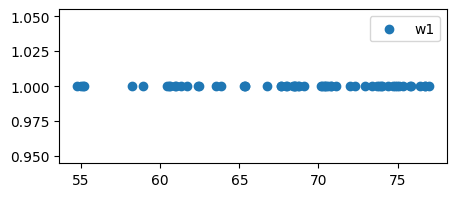

In [56]:
# plot w
plt.figure(figsize=(5, 2))
plt.scatter([e[1] for e in wq_list], np.ones_like([e[0] for e in wq_list]), label='w1')
plt.legend()

plt.show()

/tmp/ipykernel_39489/1034683053.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


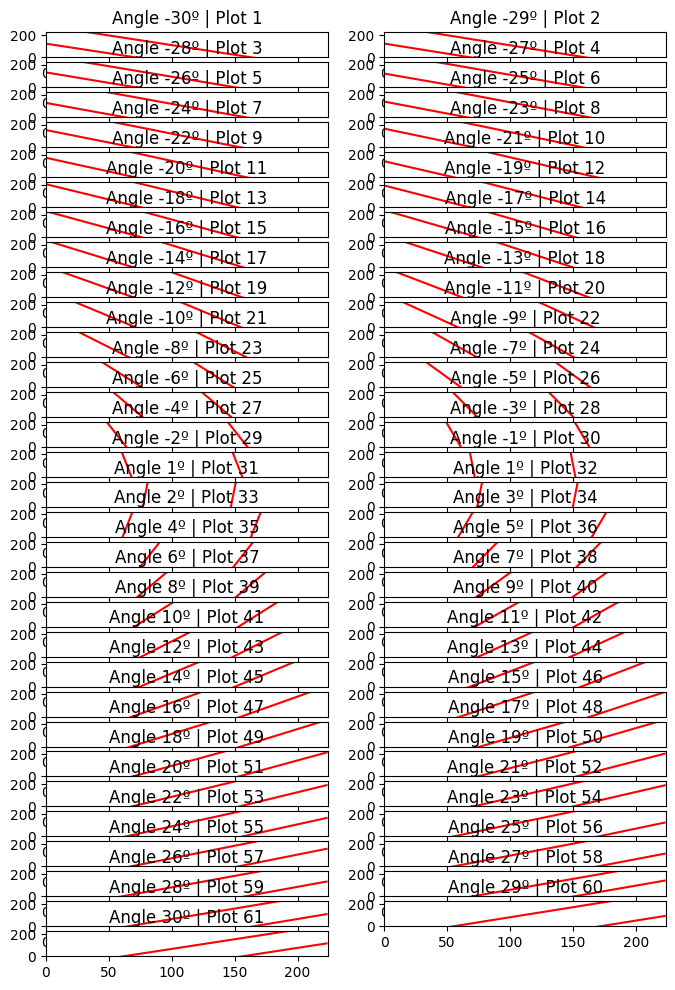

In [57]:
#* ################ PLOT ################

n = len(plot_list)  # Obtém o número de subplots a serem criados
rows = n // 2 if n % 2 == 0 else n // 2 + 1  # Calcula o número de linhas com base em n

fig, axs = plt.subplots(rows, 2, figsize=(8, 12))

# Flattening axs if there's only one row
if rows == 1:
    axs = [axs]

for i, (x, y1, y2, angle) in enumerate(plot_list):
    row = i // 2
    col = i % 2

    axs[row, col].set_xlim(0, image_size)
    axs[row, col].set_ylim(0, image_size)
    axs[row, col].plot(x, y1, 'r')
    axs[row, col].plot(x, y2, 'r')
    axs[row, col].set_title(f'Angle {angle}º | Plot {i + 1}')

# Remove subplots that are not used
for i in range(n, rows * 2):
    fig.delaxes(axs[i // 2, i % 2])

plt.tight_layout()
plt.show()
